https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


# Underfitting vs. overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The diagram shows the function we want to approximate,
which is generated by cosine function. It also shows the samples of the
real function and the approximations of different models are shown. The
models have polynomial properties of different degree. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
fit the training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. For higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the training data.
training data.

We quantitatively evaluate **overfitting** / **underfitting** using.
cross-validation. We compute the mean squared error (MSE) on the validation
the higher, the less likely it is that the model generalizes correctly from the training data.
Training data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Create artificial data

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X = X.reshape(-1,1)

In [4]:
import seaborn as sns

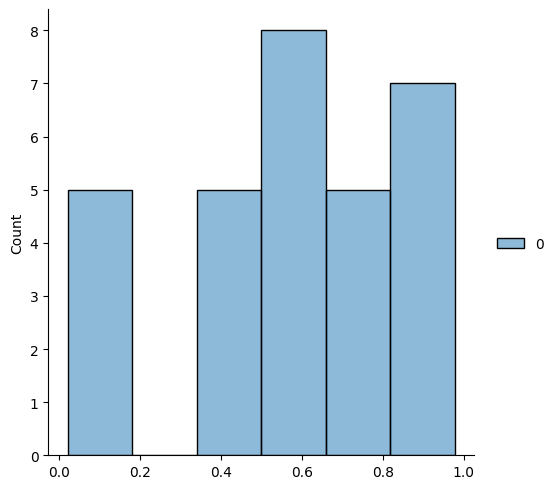

In [8]:
sns.displot(X)

### Transformers in Scikitlearn

In [9]:
transformer = PolynomialFeatures(degree=3)

In [10]:
transformer.fit(X,y)

PolynomialFeatures(degree=3)

In [11]:
transformer.transform(X)

array([[1.00000000e+00, 2.02183974e-02, 4.08783595e-04, 8.26494919e-06],
       [1.00000000e+00, 7.10360582e-02, 5.04612156e-03, 3.58456585e-04],
       [1.00000000e+00, 8.71292997e-02, 7.59151487e-03, 6.61443374e-04],
       [1.00000000e+00, 1.18274426e-01, 1.39888398e-02, 1.65452200e-03],
       [1.00000000e+00, 1.43353287e-01, 2.05501650e-02, 2.94593371e-03],
       [1.00000000e+00, 3.83441519e-01, 1.47027398e-01, 5.63764089e-02],
       [1.00000000e+00, 4.14661940e-01, 1.71944524e-01, 7.12988501e-02],
       [1.00000000e+00, 4.23654799e-01, 1.79483389e-01, 7.60389992e-02],
       [1.00000000e+00, 4.37587211e-01, 1.91482567e-01, 8.37903227e-02],
       [1.00000000e+00, 4.61479362e-01, 2.12963202e-01, 9.82781225e-02],
       [1.00000000e+00, 5.21848322e-01, 2.72325671e-01, 1.42112694e-01],
       [1.00000000e+00, 5.28894920e-01, 2.79729836e-01, 1.47947689e-01],
       [1.00000000e+00, 5.44883183e-01, 2.96897683e-01, 1.61774555e-01],
       [1.00000000e+00, 5.48813504e-01, 3.01196262e

### Prediction using Polynomial features and Pipeline

In [13]:
pipeline = Pipeline([('transformer', PolynomialFeatures(degree=3)),
                    ('model',LinearRegression())])

In [15]:
pipeline.fit(X,y)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [16]:
pipeline['transformer']

PolynomialFeatures(degree=3)

In [17]:
pipeline.predict(X)

array([ 1.12217409,  0.98071782,  0.92989751,  0.82449941,  0.73371377,
       -0.24779155, -0.36978311, -0.40384975, -0.45553938, -0.54075177,
       -0.73266701, -0.75252791, -0.79536949, -0.80541149, -0.8516187 ,
       -0.92183543, -0.97616209, -0.98272203, -1.01002048, -0.94745309,
       -0.94329826, -0.9218341 , -0.90586633, -0.81644217, -0.68083826,
       -0.58361156, -0.40431122, -0.28747047, -0.15940478, -0.05012618])

In [21]:
def plot_result(pipeline, X, y):
    X_test = np.linspace(0, 1, 100).reshape(-1,1)
    plt.plot(X_test, pipeline.predict(X_test.reshape(-1,1)), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X.reshape(-1), y, edgecolor='b', s=20, label="Datenpunkte")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim((-1.5, 1.5))
    plt.legend()
    plt.title("Degree {} - R^2: {}".format(pipeline.named_steps['transformer'].degree,
                                   np.round(r2_score(pipeline.predict(X_test.reshape(-1,1)), true_fun(X_test)), 2)))
    plt.show()

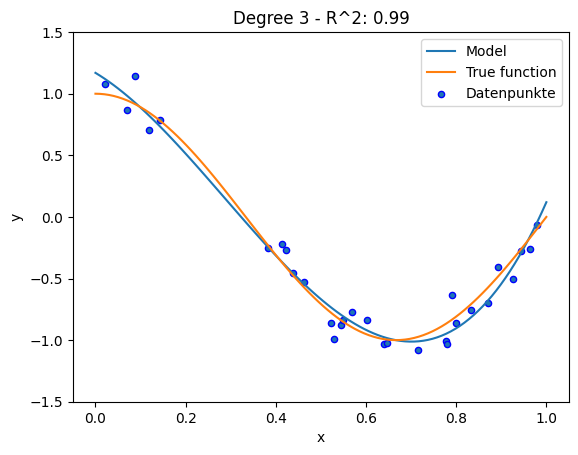

In [22]:
plot_result(pipeline, X, y)

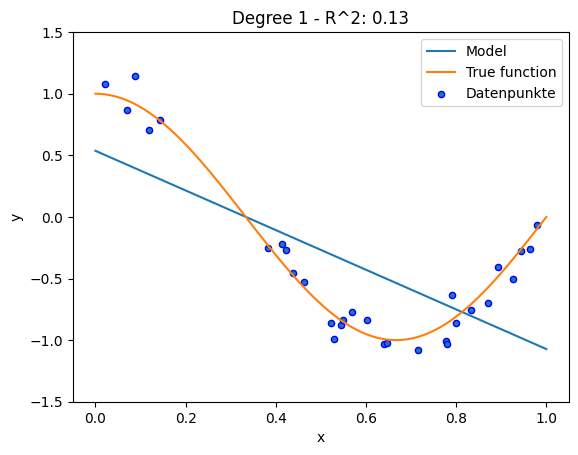

In [27]:
pipeline = Pipeline([('transformer', PolynomialFeatures(degree=1)),
                    ('model',LinearRegression())])
pipeline.fit(X,y)
plot_result(pipeline, X, y)

In [31]:
pipeline = Pipeline([('transformer', PolynomialFeatures(degree=20)),
                    ('model',LinearRegression())])
pipeline.fit(X,y)


Pipeline(steps=[('transformer', PolynomialFeatures(degree=20)),
                ('model', LinearRegression())])

In [34]:
from sklearn.svm import SVR

[ 1.39543143  1.0492497   0.94560539  0.75320283  0.60611447 -0.44807039
 -0.53806224 -0.56197335 -0.59724249 -0.65269994 -0.76454573 -0.77495992
 -0.79654151 -0.80141157 -0.82276447 -0.8509005  -0.86616471 -0.86718615
 -0.85003903 -0.78815648 -0.78496312 -0.7690486  -0.7577122  -0.69907488
 -0.61881949 -0.56495763 -0.47078593 -0.41207621 -0.34958825 -0.29756302]


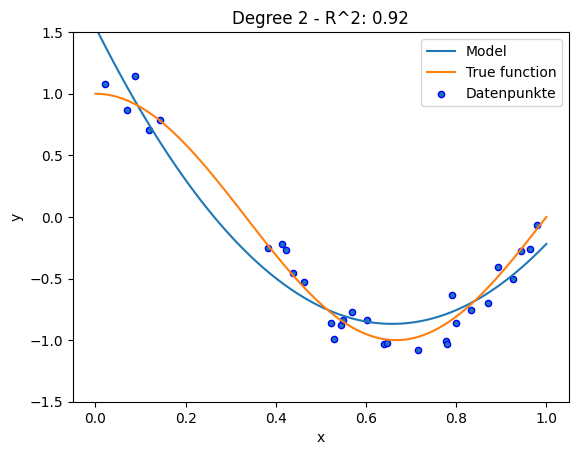

[ 0.98137056  0.90261161  0.87153837  0.80297777  0.73973942 -0.16250237
 -0.29976576 -0.33889995 -0.39888557 -0.4991932  -0.72918463 -0.75304096
 -0.8042919  -0.81624171 -0.87072038 -0.95054457 -1.00610519 -1.01191874
 -1.01209814 -0.90488768 -0.89898566 -0.8694672  -0.8484021  -0.74056847
 -0.60005186 -0.51202764 -0.37188045 -0.29370713 -0.21828028 -0.16148969]


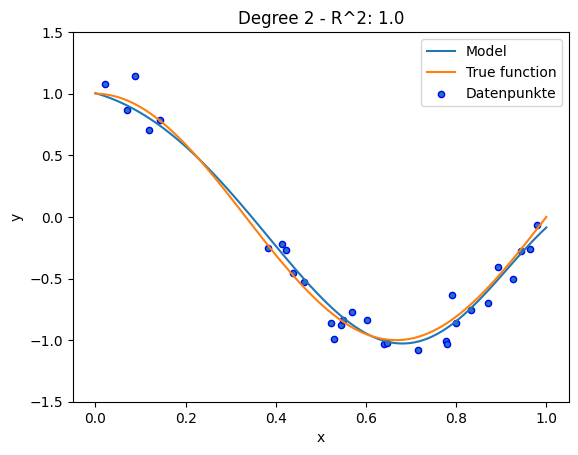

In [37]:
my_models = [LinearRegression(), SVR()]
for model in my_models:
    pipeline = Pipeline([('transformer', PolynomialFeatures(degree=2)),
                         ('model', model)])
    pipeline.fit(X, y)
    pipeline['transformer']
    
    print(pipeline.predict(X))
    plot_result(pipeline, X, y)